# Standard Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import Cleaning

In [2]:
# Invoice id: Computer generated sales slip invoice identification number
# Branch: Branch of supercenter (3 branches are available identified by A, B and C).
# City: Location of supercenters
# Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
# Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
# Unit price: Price of each product in $
# Quantity: Number of products purchased by customer
# Tax: 5% tax fee for customer buying
# Total: Total price including tax
# Date: Date of purchase (Record available from January 2019 to March 2019)
# Time: Purchase time (10am to 9pm)
# Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
# Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [3]:
# Load data, this contains first quarter 2019 sales data
sales = pd.read_csv("C:\\Users\\Drew\\Desktop\\Datasets\\supermarket_sales.csv")
sales.shape

(1000, 17)

In [4]:
# Get rid of all extra symbols and create lower case, underscore-separated names
Cleaning.col_name_clean(sales);

In [6]:
# Convertime column to datetime instead of object
sales['date'] = pd.to_datetime(sales['date'])

In [7]:
# Check for null values
sales.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5                      0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [8]:
# Prepare Month Column
sales['month'] = sales['date'].dt.month

In [10]:
# Basic descriptive statistics for sales dataframe
sales.describe()

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,3.000000


In [19]:
# Correlation matrix for the sales dataframe for general relationships
sales.corr()

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
unit_price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.027387
quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.014524
tax_5,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
gross_margin_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.042880
month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,1.000000


- It seems odd that the cusomter ratings are actually negatively correlated with all other aspects

## Perform grouping for all categorical variable columns to create unique df's (except city, each branch is located in a specific city)

In [108]:
# View of each branch's summed characteristics
branch = sales.groupby(['branch']).sum()
branch

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
branch,,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,688
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,665
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,640


In [91]:
# Total number of unique transactions
sales['branch'].value_counts()

A    340
B    332
C    328
Name: branch, dtype: int64

In [92]:
# Average transaction total
sales.groupby('branch').total.mean()

branch
A    312.354031
B    319.872506
C    337.099715
Name: total, dtype: float64

In [75]:
# Average transaction unit price
sales.groupby('branch').unit_price.mean()

branch
A    54.780853
B    55.659277
C    56.609024
Name: unit_price, dtype: float64

<AxesSubplot:xlabel='branch', ylabel='gross_income'>

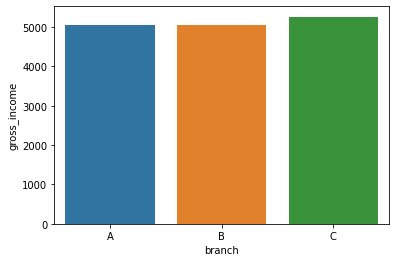

In [125]:
# Gross Income 
sns.barplot(x=branch.index, y='gross_income', data=branch, errwidth=False)

In [147]:
# Product line breakdown
products = sales.groupby(['product_line']).sum()
products

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
product_line,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,348
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,346
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,348
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,312
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,324
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,315


<AxesSubplot:xlabel='product_line', ylabel='gross_income'>

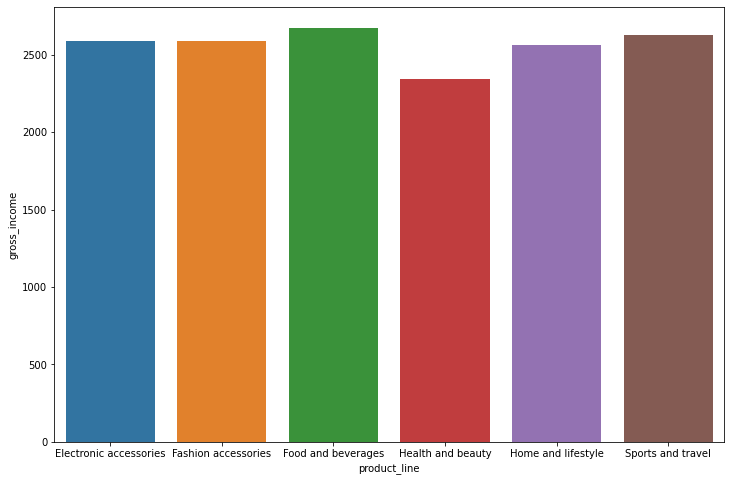

In [148]:
# Product line gross income
plt.figure(figsize=(12,8))
sns.barplot(x=products.index, y='gross_income', data=products, errwidth=False)

- We see that Health and Beauty products are under-performing compared to other, relatively similar, product lines

In [149]:
# Branch breakdown by gender
branch_gender = sales.groupby(['branch','gender']).sum()
branch_gender

unit_price  quantity      tax_5       total      cogs  \
branch gender                                                          
A      Female     9029.87       909  2536.6270  53269.1670  50732.54   
       Male       9595.62       950  2520.5335  52931.2035  50410.67   
B      Female     8775.24       911  2520.3950  52928.2950  50407.90   
       Male       9703.64       909  2536.6370  53269.3770  50732.74   
C      Female     9882.13      1049  2937.4030  61685.4630  58748.06   
       Male       8685.63       782  2327.7735  48883.2435  46555.47   

               gross_margin_percentage  gross_income  rating  month  
branch gender                                                        
A      Female               766.666667     2536.6270  1101.1    333  
       Male                 852.380952     2520.5335  1288.1    355  
B      Female               771.428571     2520.3950  1114.0    315  
       Male                 809.523810     2536.6370  1149.6    350  
C      Female               847.619048     2937.4030  1274.1    339  
       Male                 714.285714     2327.7735  1045.8    301

- Female customers generate the most gross income but appear to be unhappy with the branches A & B while being comparatively happier with C

In [151]:
# Branch product line breakdown
branch_products = sales.groupby(['branch','product_line']).sum()
branch_products

unit_price  quantity      tax_5       total  \
branch product_line                                                          
A      Electronic accessories     3292.27       322   872.2435  18317.1135   
       Fashion accessories        2890.19       263   777.7385  16332.5085   
       Food and beverages         3188.52       313   817.2905  17163.1005   
       Health and beauty          2343.53       257   599.8930  12597.7530   
       Home and lifestyle         3629.97       371  1067.4855  22417.1955   
       Sports and travel          3281.01       333   922.5095  19372.6995   
B      Electronic accessories     2741.98       316   811.9735  17051.4435   
       Fashion accessories        3400.32       297   781.5865  16413.3165   
       Food and beverages         2777.00       270   724.5185  15214.8885   
       Health and beauty          3083.84       320   951.4600  19980.6600   
       Home and lifestyle         2775.70       295   835.6745  17549.1645   
       Sports and travel          3700.04       322   951.8190  19988.1990   
C      Electronic accessories     3069.52       333   903.2845  18968.9745   
       Fashion accessories        3882.84       342  1026.6700  21560.0700   
       Food and beverages         3780.02       369  1131.7550  23766.8550   
       Health and beauty          2910.51       277   791.2060  16615.3260   
       Home and lifestyle         2445.04       245   661.6930  13895.5530   
       Sports and travel          2479.83       265   750.5680  15761.9280   

                                   cogs  gross_margin_percentage  \
branch product_line                                                
A      Electronic accessories  17444.87               285.714286   
       Fashion accessories     15554.77               242.857143   
       Food and beverages      16345.81               276.190476   
       Health and beauty       11997.86               223.809524   
       Home and lifestyle      21349.71               309.523810   
       Sports and travel       18450.19               280.952381   
B      Electronic accessories  16239.47               261.904762   
       Fashion accessories     15631.73               295.238095   
       Food and beverages      14490.37               238.095238   
       Health and beauty       19029.20               252.380952   
       Home and lifestyle      16713.49               238.095238   
       Sports and travel       19036.38               295.238095   
C      Electronic accessories  18065.69               261.904762   
       Fashion accessories     20533.40               309.523810   
       Food and beverages      22635.10               314.285714   
       Health and beauty       15824.12               247.619048   
       Home and lifestyle      13233.86               214.285714   
       Sports and travel       15011.36               214.285714   

                               gross_income  rating  month  
branch product_line                                         
A      Electronic accessories      872.2435   414.7    120  
       Fashion accessories         777.7385   350.8     97  
       Food and beverages          817.2905   420.7    123  
       Health and beauty           599.8930   324.3    105  
       Home and lifestyle         1067.4855   450.5    128  
       Sports and travel           922.5095   428.2    115  
B      Electronic accessories      811.9735   391.4    110  
       Fashion accessories         781.5865   416.8    120  
       Food and beverages          724.5185   349.7     95  
       Health and beauty           951.4600   376.3    111  
       Home and lifestyle          835.6745   325.8    108  
       Sports and travel           951.8190   403.6    121  
C      Electronic accessories      903.2845   371.1    118  
       Fashion accessories        1026.6700   483.6    129  
       Food and beverages         1131.7550   467.3    130  
       Health and beauty           791.2060   363.9     96  
       Home

- Bracnh B has the most even distribution of income across product lines while both Branch A and B have a distinct worst line
- On the other hand, both Branch A and C have one (two for Branch C) product line that produces a higher proportion of gross income
- Could let the branches begin to focus more on those areas of success and phase out the worse performing product lines monitoring for change in foot traffic depending on changes in product availability

In [86]:
# Average branch rating
print(sales.groupby('branch').rating.mean())

# Deeper dive into the customer ratings
print(sales.groupby(['branch','product_line'])[['rating','quantity']].mean())

# Gendered discrepencies?
branchB = sales[sales.branch == 'B']
branchB.groupby(['branch','product_line', 'gender'])[['rating','quantity']].mean()

branch
A    7.027059
B    6.818072
C    7.072866
Name: rating, dtype: float64
                                 rating  quantity
branch product_line                              
A      Electronic accessories  6.911667  5.366667
       Fashion accessories     6.878431  5.156863
       Food and beverages      7.253448  5.396552
       Health and beauty       6.900000  5.468085
       Home and lifestyle      6.930769  5.707692
       Sports and travel       7.257627  5.644068
B      Electronic accessories  7.116364  5.745455
       Fashion accessories     6.722581  4.790323
       Food and beverages      6.994000  5.400000
       Health and beauty       7.100000  6.037736
       Home and lifestyle      6.516000  5.900000
       Sports and travel       6.509677  5.193548
C      Electronic accessories  6.747273  6.054545
       Fashion accessories     7.440000  5.261538
       Food and beverages      7.080303  5.590909
       Health and beauty       6.998077  5.326923
       Home and lifest

rating  quantity
branch product_line           gender                    
B      Electronic accessories Female  7.103571  5.571429
                              Male    7.129630  5.925926
       Fashion accessories    Female  6.681818  5.363636
                              Male    6.768966  4.137931
       Food and beverages     Female  7.324138  5.827586
                              Male    6.538095  4.809524
       Health and beauty      Female  7.290000  5.600000
                              Male    6.984848  6.303030
       Home and lifestyle     Female  6.604545  6.681818
                              Male    6.446429  5.285714
       Sports and travel      Female  6.370000  5.000000
                              Male    6.640625  5.375000

- There seems to be some customer relations issues at branch B as they have the second highest number of unique transactions but the lowest overall average ratings
- It appears as though Home & Lifestyle and Sprots & Travel products (employees stationed to help in those areas) are producing the worst ratings for branch B and bringing down their overall average
- We see that both males and females are relatively unhappy with both product lines, but there is specific gender unhappiness with each line while amount being purchased informs that this isn't a sample size issue

In [83]:
# Type of customer characteristics
customer = sales.groupby(['customer_type']).sum()
customer

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
customer_type,,,,,,,,,
Member,28159.70,2785,7820.164,164223.444,156403.28,2385.714286,7820.164,3477.1,996
Normal,27512.43,2725,7559.205,158743.305,151184.10,2376.190476,7559.205,3495.6,997


In [140]:
# Customer type ratings
sales.groupby(['customer_type'])['rating'].mean()

customer_type
Member    6.940319
Normal    7.005210
Name: rating, dtype: float64

In [141]:
# Customer type gendered breakdown
sales.groupby(['customer_type','gender']).sum()

unit_price  quantity      tax_5       total      cogs  \
customer_type gender                                                          
Member        Female    14558.14      1492  4197.4735  88146.9435  83949.47   
              Male      13601.56      1293  3622.6905  76076.5005  72453.81   
Normal        Female    13129.10      1377  3796.9515  79735.9815  75939.03   
              Male      14383.33      1348  3762.2535  79007.3235  75245.07   

                      gross_margin_percentage  gross_income  rating  month  
customer_type gender                                                        
Member        Female              1242.857143     4197.4735  1811.5    522  
              Male                1142.857143     3622.6905  1665.6    474  
Normal        Female              1142.857143     3796.9515  1677.7    465  
              Male                1233.333333     3762.2535  1817.9    532

In [143]:
# Customer type gendered unique transactions
sales.groupby(['customer_type','gender'])['invoice_id'].count()

customer_type  gender
Member         Female    261
               Male      240
Normal         Female    240
               Male      259
Name: invoice_id, dtype: int64

- Members are the best customers, but there is a problem with the male members as they are the worst subset of all customers even though they are doing the same amount of transactions as female non-members, which generate the second highest gross income

In [29]:
# Gendered Characteristics
gender = sales.groupby(['gender']).sum()
gender

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
gender,,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2,987
Male,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5,1006


In [28]:
# Product groups
product = sales.groupby(['product_line']).sum()
product

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
product_line,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,348
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,346
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,348
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,312
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,324
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,315


In [87]:
# Payment type 
payment = sales.groupby(['payment']).sum()
payment

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
payment,,,,,,,,,
Cash,19525.09,1896,5343.170,112206.570,106863.40,1638.095238,5343.170,2397.7,676
Credit card,16916.68,1722,4798.432,100767.072,95968.64,1480.952381,4798.432,2178.0,617
Ewallet,19230.36,1892,5237.767,109993.107,104755.34,1642.857143,5237.767,2397.0,700


In [144]:
# Payment type tranactions count
sales.payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

- Cash and Ewallet being nearly identical in usage is odd. One might expect that if not using Ewallet, a credit card would be used instead as they are interchangable with one another

In [32]:
# Monthly comparison
months = sales.groupby(['month']).sum()
months

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating
month,,,,,,,,
1,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2
2,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6
3,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9


<AxesSubplot:xlabel='month', ylabel='gross_income'>

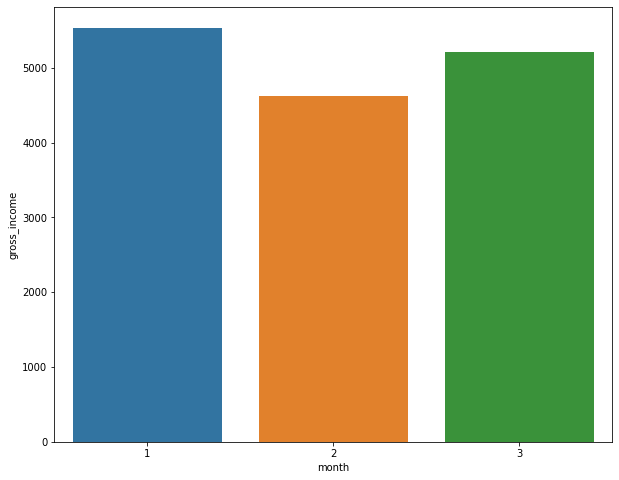

In [145]:
# Monthly gross income
plt.figure(figsize=(10,8))
sns.barplot(x=months.index, y='gross_income', data=months, errwidth=False)

- A relatively odd dip during February. We could assume that January was a better month due the New Years Resolutions crowd, but the month of March makes it appear as though February was abnormally low. 
- You would assume that with a holiday in February, and given the product lines that are sold, the month would almost outperform the surrounding months. 

In [146]:
# Monthly product line breakdown
sales.groupby(['month','product_line']).sum()

unit_price  quantity      tax_5       total  \
month product_line                                                          
1     Electronic accessories     2950.21       333   896.7280  18831.2880   
      Fashion accessories        3543.65       336   921.1960  19345.1160   
      Food and beverages         3237.38       325   931.9300  19570.5300   
      Health and beauty          2857.81       254   780.1510  16383.1710   
      Home and lifestyle         3337.09       342   975.9400  20494.7400   
      Sports and travel          3827.75       375  1031.7630  21667.0230   
2     Electronic accessories     2938.94       313   826.8050  17362.9050   
      Fashion accessories        3716.89       295   905.2315  19009.8615   
      Food and beverages         3367.99       349   952.3980  20000.3580   
      Health and beauty          2486.34       266   695.3455  14602.2555   
      Home and lifestyle         2100.08       205   592.1135  12434.3835   
      Sports and travel          2549.28       226   657.6005  13809.6105   
3     Electronic accessories     3214.62       325   863.9685  18143.3385   
      Fashion accessories        2912.81       271   759.5675  15950.9175   
      Food and beverages         3140.17       278   789.2360  16573.9560   
      Health and beauty          2993.73       334   867.0625  18208.3125   
      Home and lifestyle         3413.54       364   996.7995  20932.7895   
      Sports and travel          3083.85       319   935.5330  19646.1930   

                                  cogs  gross_margin_percentage  gross_income  \
month product_line                                                              
1     Electronic accessories  17934.56               257.142857      896.7280   
      Fashion accessories     18423.92               304.761905      921.1960   
      Food and beverages      18638.60               266.666667      931.9300   
      Health and beauty       15603.02               233.333333      780.1510   
      Home and lifestyle      19518.80               280.952381      975.9400   
      Sports and travel       20635.26               333.333333     1031.7630   
2     Electronic accessories  16536.10               257.142857      826.8050   
      Fashion accessories     18104.63               285.714286      905.2315   
      Food and beverages      19047.96               295.238095      952.3980   
      Health and beauty       13906.91               219.047619      695.3455   
      Home and lifestyle      11842.27               180.952381      592.1135   
      Sports and travel       13152.01               204.761905      657.6005   
3     Electronic accessories  17279.37               295.238095      863.9685   
      Fashion accessories     15191.35               257.142857      759.5675   
      Food and beverages      15784.72               266.666667      789.2360   
      Health and beauty       17341.25               271.428571      867.0625   
      Home and lifestyle      19935.99               300.000000      996.7995   
      Sports and travel       18710.66               252.380952      935.5330   

                              rating  
month product_line                    
1     Electronic accessories   385.7  
      Fashion accessories      451.9  
      Food and beverages       414.7  
      Health and beauty        349.3  
      Home and lifestyle       393.7  
      Sports and travel        474.9  
2     Electronic accessories   376.1  
      Fashion accessories      424.9  
      Food and beverages       434.8  
      Health and beauty        331.5  
      Home and lifestyle       268.7  
      Sports and travel        306.6  
3     Electronic accessories   415.4  
      Fashion accessories      374.4  
      Food and beverages       388.2  
      Health and beauty        383.7  
      Home and lifestyle       431.6  
      Sports and travel        366.6